<a href="https://colab.research.google.com/github/Latamila/ConsumoEnergiaSerieTemporal/blob/main/MLP_Seriestemporais_multivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())


Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [ ]:
!pip install -q tensorflow==2.11.0


In [ ]:
!pip install watermark

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, explained_variance_score
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

keras     : 2.11.0
plotly    : 5.15.0
tensorflow: 2.11.0
numpy     : 1.23.5
seaborn   : 0.12.2
sklearn   : 1.2.2
pandas    : 1.5.3
matplotlib: 3.7.1



##CARRREGANDO OS DADOS


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.shape

(124, 12)

In [ ]:
df.head()

,data,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
0,2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
1,2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2,2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
3,2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
4,2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


In [ ]:
df.tail()

,data,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
119,2022-11-01,362,363,2626.91,1252.78,738.07,427.49,1430.48,60.18,186.68326,38.2,77.950000
120,2022-12-01,310,322,2736.64,1287.68,749.57,385.09,1472.27,62.25,210.72987,33.7,76.177419
121,2023-01-01,277,307,2842.81,1289.12,761.60,373.03,1525.43,63.04,244.41912,4.6,74.774194
122,2023-02-01,323,330,2936.19,1303.59,759.59,390.69,1572.25,71.52,223.31732,6.9,66.910714
123,2023-03-01,360,339,2847.84,1234.88,771.62,396.87,1302.61,74.80,228.56676,41.5,69.000000


In [ ]:
df.columns

Index(['data', 'petroleo_bruto', 'minerio_ferro', 'ouro', 'arroz', 'feijao',
       'milho', 'soja', 'trigo', 'cafe', 'algodao', 'umidade'],
      dtype='object')

In [ ]:
#converte a coluna de data em indice
df.index = pd.to_datetime(df['data'],format = '%Y.%m.%d')

In [ ]:
df


,data,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,,
2012-12-01,2012-12-01,323,455,3102.61,423.45,844.00,468.00,578.00,28.67,207.70504,117.7,79.261905
2013-01-01,2013-01-01,345,546,3100.45,415.85,799.00,485.00,557.00,24.49,228.94287,4.5,82.193548
2013-02-01,2013-02-01,362,595,3199.41,410.77,718.00,466.00,552.00,22.06,238.41747,25.1,74.839286
2013-03-01,2013-03-01,376,636,3281.67,414.82,614.00,442.00,574.00,21.64,218.47599,53.6,77.935484
2013-04-01,2013-04-01,383,738,3261.65,451.04,619.00,429.00,595.00,22.30,226.15010,166.0,80.450000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,2022-11-01,362,363,2626.91,1252.78,738.07,427.49,1430.48,60.18,186.68326,38.2,77.950000
2022-12-01,2022-12-01,310,322,2736.64,1287.68,749.57,385.09,1472.27,62.25,210.72987,33.7,76.177419
2023-01-01,2023-01-01,277,307,2842.81,1289.12,761.60,373.03,1525.43,63.04,244.41912,4.6,74.774194


In [ ]:
del df['data'] #deletar a coluna data porque foi para o indice.

In [ ]:
df.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


Text(0.5, 0, '\nData')

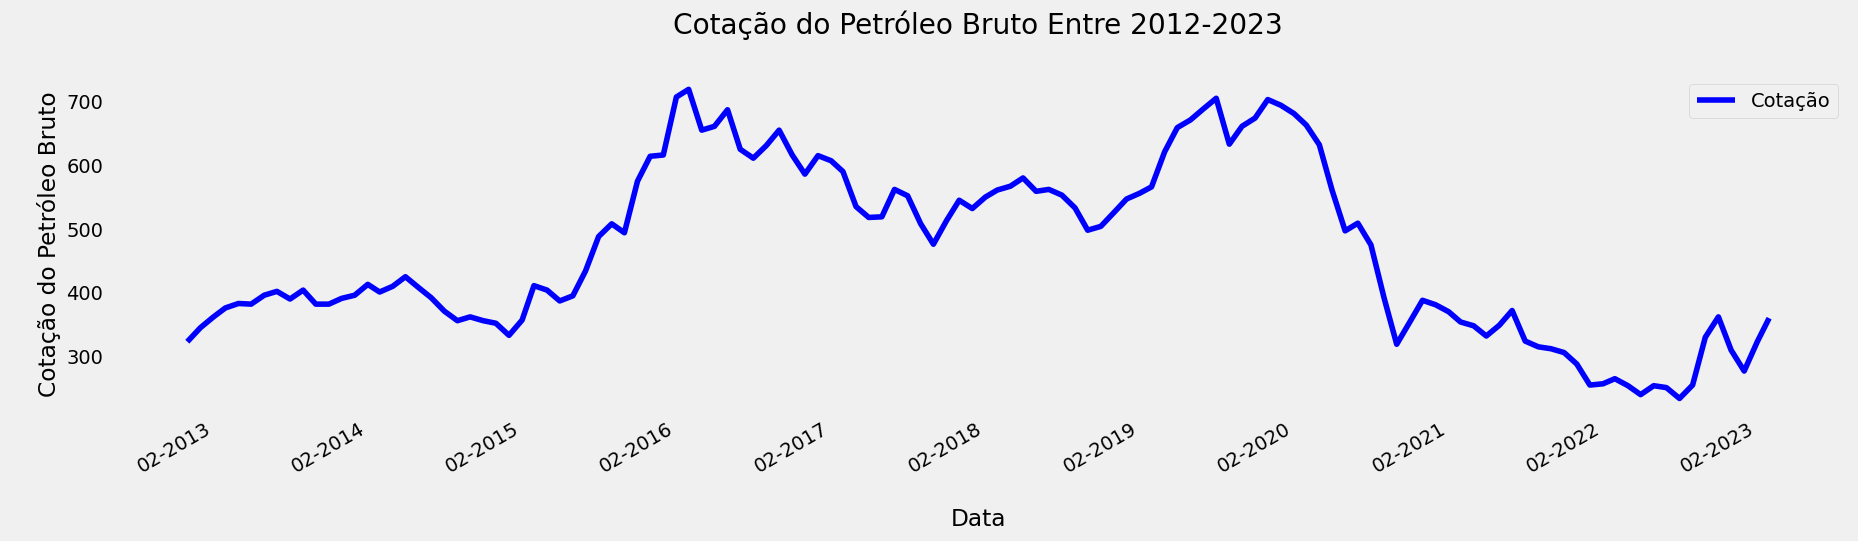

In [ ]:
# Plot
plt.figure(figsize = (20,5))
#tamanho
plt.grid()
plt.plot(df.index, df['petroleo_bruto'], color = 'blue')
#recorte dos dados
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
#recorte para mostrar no eixo x de 12 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#formatando esses 12 meses, para aparecer so mes e ano
plt.gcf().autofmt_xdate()
plt.legend(['Cotação'], loc='best')
#valores da coluna cotação para o eixo y
plt.title('Cotação do Petróleo Bruto Entre 2012-2023\n')
#o titulo do grafico
plt.ylabel('\nCotação do Petróleo Bruto')
#eixo y legenda
plt.xlabel('\nData')

In [ ]:
# Plot da cotação de outros commodities
fig = make_subplots(rows = 10, cols = 1)

fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['minerio_ferro'],
                         name = 'Minério de Ferro'), row = 1, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['ouro'],
                         name = 'Ouro'), row = 2, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['arroz'],
                         name = 'Arroz'), row = 3, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['feijao'],
                         name = 'Feijão'), row = 4, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['milho'],
                         name = 'Milho'), row = 5, col = 1
)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['soja'],
                         name = 'Soja'), row = 6, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['trigo'],
                         name = 'Trigo'), row = 7, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['cafe'],
                         name = 'Café'), row = 8, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['cafe'],
                         name = 'algodao'), row = 9, col = 1

)
fig.add_trace(go.Scatter(x = df.reset_index()['data'],
                         y = df.reset_index()['umidade'],
                         name = 'Umidade'), row = 10, col = 1

)
fig.update_layout(height = 1000, width = 1200, title_text = "Valores ao Longo do Tempo")
fig.show()

<Figure size 2500x1000 with 0 Axes>

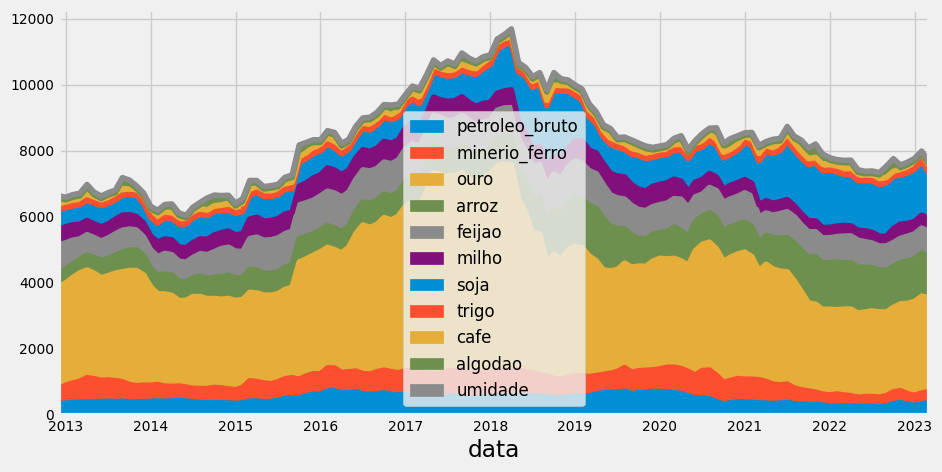

In [ ]:
# Plot
plt.figure(figsize = (25,10))
ax = df.plot.area(fontsize = 10);
ax.set_xlabel('data');
ax.legend(fontsize=12);

##ARQUITETURA MULTILAYER PERCEPTRON (MLP)
Nao é deep learning.

In [ ]:
# Proporção de dados para treino e teste
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size# serie temporal nao pode ser aleatoria
#pois tem o fator tempo.

In [ ]:
# Define o tamanho das amostras
#por ser uma serie temporal a ordem importa
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [ ]:
print('Tamanho da Amostra de Treino:', len(train))
print('Tamanho da Amostra de Teste:', len(test))

Tamanho da Amostra de Treino: 99
Tamanho da Amostra de Teste: 25


In [ ]:
print(train.shape)
train.head()

(99, 11)


,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,455,3102.61,423.45,844.0,468.0,578.0,28.67,207.70504,117.7,79.261905
2013-01-01,345,546,3100.45,415.85,799.0,485.0,557.0,24.49,228.94287,4.5,82.193548
2013-02-01,362,595,3199.41,410.77,718.0,466.0,552.0,22.06,238.41747,25.1,74.839286
2013-03-01,376,636,3281.67,414.82,614.0,442.0,574.0,21.64,218.47599,53.6,77.935484
2013-04-01,383,738,3261.65,451.04,619.0,429.0,595.0,22.30,226.15010,166.0,80.450000


In [ ]:
# Variáveis preditoras
variaveis_preditoras = ['minerio_ferro',
                        'ouro',
                        'arroz',
                        'feijao',
                        'milho',
                        'soja',
                        'trigo',
                        'cafe',
                        'algodao',
                        'umidade']

In [ ]:
# Prepara o padronizador das variáveis preditoras
#normalização dos dados já que os valores sao discrepantes
scaler_preditores = MinMaxScaler()

In [ ]:
# Fit nos dados de treino
scaler_preditores = scaler_preditores.fit(train[variaveis_preditoras].to_numpy())


In [ ]:
# Transform nos dados de treino
train.loc[:, variaveis_preditoras] = scaler_preditores.transform(train[variaveis_preditoras].to_numpy())

In [ ]:
train.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2012-12-01,323,0.112288,0.140918,0.010736,0.528090,0.253193,0.023302,0.109026,0.617026,0.366984,0.843364
2013-01-01,345,0.305085,0.140327,0.004301,0.443820,0.306536,0.009321,0.044200,0.815738,0.007619,0.983088
2013-02-01,362,0.408898,0.167408,0.000000,0.292135,0.246917,0.005992,0.006514,0.904388,0.073016,0.632580
2013-03-01,376,0.495763,0.189919,0.003429,0.097378,0.171609,0.020639,0.000000,0.717805,0.163492,0.780147
2013-04-01,383,0.711864,0.184440,0.034095,0.106742,0.130817,0.034621,0.010236,0.789608,0.520317,0.899990


In [ ]:
# Transform nos dados de teste
test.loc[:, variaveis_preditoras] = scaler_preditores.transform(test[variaveis_preditoras].to_numpy())

In [ ]:
test.head()

,petroleo_bruto,minerio_ferro,ouro,arroz,feijao,milho,soja,trigo,cafe,algodao,umidade
data,,,,,,,,,,,
2021-03-01,354,0.637712,0.194855,0.382454,0.381292,-0.039662,0.493342,0.455180,0.707023,0.548889,0.265874
2021-04-01,348,0.533898,0.264388,0.393951,0.213633,-0.054975,0.597870,0.515974,0.732180,0.017143,0.437683
2021-05-01,332,0.400424,0.246417,0.453802,0.235262,-0.092159,0.606525,0.530397,0.708895,0.444127,0.349664
2021-06-01,349,0.317797,0.234308,0.509834,0.320749,-0.074743,0.631824,0.593207,0.808476,0.181905,0.645800
2021-07-01,372,0.313559,0.223422,0.526454,0.426610,-0.066114,0.773462,0.641749,0.866202,0.436825,0.577974


In [ ]:
# Padronizador da variável alvo
#tenho que criar outro padronizador nao posso usar o mesmo
scaler_target = MinMaxScaler()#para o alvo ficar na mesma escala

In [ ]:
# Fit nos dados de treino
scaler_target = scaler_target.fit(train[['petroleo_bruto']])

In [ ]:
# Transform nos dados de treino
train['petroleo_bruto'] = scaler_target.transform(train[['petroleo_bruto']])

In [ ]:
train['petroleo_bruto'].head()

data
2012-12-01    0.0100
2013-01-01    0.0650
2013-02-01    0.1075
2013-03-01    0.1425
2013-04-01    0.1600
Name: petroleo_bruto, dtype: float64

In [ ]:
#Transform nos dados de teste
test['petroleo_bruto'] = scaler_target.transform(test[['petroleo_bruto']])

In [ ]:
test['petroleo_bruto'].head()

data
2021-03-01    0.0875
2021-04-01    0.0725
2021-05-01    0.0325
2021-06-01    0.0750
2021-07-01    0.1325
Name: petroleo_bruto, dtype: float64

In [ ]:
# Função para criar o dataset final
def createDataset(X, y, time_steps):#time_steps=espaços de tempo

    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)
        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 3

In [ ]:
X_train, y_train = createDataset(train, train.petroleo_bruto, time_steps)

In [ ]:
X_test, y_test = createDataset(test, test.petroleo_bruto, time_steps)

In [ ]:
print(X_train.shape, y_train.shape)

(96, 3, 11) (96,)


In [ ]:
print(X_test.shape, y_test.shape)


(22, 3, 11) (22,)


In [ ]:
X_train_mlp = X_train[:, :, 0]

In [ ]:
X_test_mlp = X_test[:, :, 0]

#MODELAGEM COM MLP

In [ ]:
# Cria o modelo
modelo_mlp = tf.keras.Sequential()#128 camadas, numeros de colunas do dataset de entrada, activation
modelo_mlp.add(tf.keras.layers.Dense(128, input_dim = X_train.shape[1], activation = 'relu'))
modelo_mlp.add(tf.keras.layers.Dense(1))# 1 neuronio de saida porque tem uma variavel alvo.

In [ ]:
# Compila o modelo
modelo_mlp.compile(loss = 'mse', optimizer = 'adam')
#erro quadratico medico, com otimizador adam.
#mlp é uma rede neural artificial e nao deep learning.

In [ ]:
modelo_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
modelo_mlp_history = modelo_mlp.fit(X_train_mlp,
                                    y_train,
                                    epochs = 100,
                                    batch_size = 32,#blocos de 32 em 32
                                    validation_split = 0.1,
                                    shuffle = False
)

Epoch 1/100
3/3 [==============================] - 1s 140ms/step - loss: 0.6457 - val_loss: 0.2094
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5443 - val_loss: 0.1616
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.4517 - val_loss: 0.1205
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.3690 - val_loss: 0.0865
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.2964 - val_loss: 0.0598
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.2337 - val_loss: 0.0402
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1802 - val_loss: 0.0271
Epoch 8/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1354 - val_loss: 0.0197
Epoch 9/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0990 - val_loss: 0.0175
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0706 - val_loss: 0.0199
Epoch 11/100
3/3 [

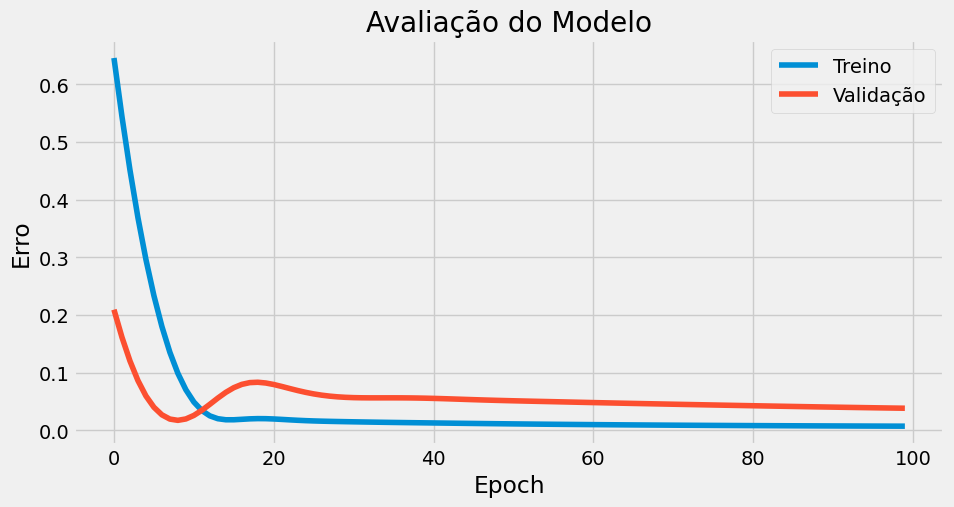

In [ ]:
# Plot
plt.plot(modelo_mlp_history.history['loss'])
plt.plot(modelo_mlp_history.history['val_loss'])
plt.title('Avaliação do Modelo')
plt.ylabel('Erro')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper right')
plt.show()

##PREVISOES COM DADOS DE TESTE

In [ ]:
y_pred = modelo_mlp.predict(X_test_mlp)

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_pred

array([[ 0.12070382],
       [ 0.1254595 ],
       [ 0.14525065],
       [ 0.1237687 ],
       [ 0.10212708],
       [ 0.05096318],
       [ 0.03426018],
       [ 0.01854385],
       [ 0.00306831],
       [-0.00551337],
       [-0.00184113],
       [-0.00046658],
       [-0.00754608],
       [-0.00963147],
       [-0.00350234],
       [-0.00840523],
       [-0.01234793],
       [ 0.02270577],
       [ 0.07939628],
       [ 0.09103227],
       [ 0.04829901],
       [ 0.0406598 ]], dtype=float32)

In [ ]:
# Invertemos a escala para visualizar o valor real e a previsão
#usa o mesmo padronizador criado antes que usei na variavel preditora
y_train_inv = scaler_target.inverse_transform(y_train.reshape(1, -1))
y_test_inv = scaler_target.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = scaler_target.inverse_transform(y_pred.reshape(1,-1))

In [ ]:
print(y_train_inv)

[[376. 383. 382. 396. 402. 390. 404. 382. 382. 391. 396. 413. 401. 410.
  425. 408. 392. 371. 356. 362. 356. 352. 333. 357. 411. 404. 387. 395.
  434. 488. 508. 494. 575. 614. 616. 707. 719. 655. 661. 687. 625. 611.
  631. 655. 616. 586. 615. 607. 590. 535. 518. 519. 562. 552. 508. 476.
  513. 545. 532. 550. 561. 567. 580. 559. 562. 553. 533. 498. 504. 525.
  547. 556. 566. 621. 659. 671. 688. 705. 633. 661. 674. 703. 694. 681.
  663. 632. 561. 497. 509. 475. 392. 319. 354. 388. 381. 370.]]


In [ ]:
print(y_test_inv)

[[349. 372. 324. 315. 312. 306. 288. 255. 257. 265. 254. 240. 254. 251.
  234. 255. 330. 362. 310. 277. 323. 360.]]


In [ ]:
#matriz numpy porque tem dois colchetes.
print(y_pred_inv)


[[367.28152 369.1838  377.10025 368.50748 359.85083 339.38528 332.70407
  326.41754 320.22733 316.79465 318.26355 318.8134  315.98157 315.1474
  317.59906 315.6379  314.06082 328.0823  350.7585  355.4129  338.3196
  335.26392]]


In [ ]:
# Ajusta o shape
y_train_inv = y_train_inv.flatten()
#converte matriz em um objeto unidimensional
y_train_inv

array([376., 383., 382., 396., 402., 390., 404., 382., 382., 391., 396.,
       413., 401., 410., 425., 408., 392., 371., 356., 362., 356., 352.,
       333., 357., 411., 404., 387., 395., 434., 488., 508., 494., 575.,
       614., 616., 707., 719., 655., 661., 687., 625., 611., 631., 655.,
       616., 586., 615., 607., 590., 535., 518., 519., 562., 552., 508.,
       476., 513., 545., 532., 550., 561., 567., 580., 559., 562., 553.,
       533., 498., 504., 525., 547., 556., 566., 621., 659., 671., 688.,
       705., 633., 661., 674., 703., 694., 681., 663., 632., 561., 497.,
       509., 475., 392., 319., 354., 388., 381., 370.])

In [ ]:
# Ajusta o shape
y_test_inv = y_test_inv.flatten()
#flatten converte a matriz em um objeto unidimensional com um colchete so.
y_test_inv

array([349., 372., 324., 315., 312., 306., 288., 255., 257., 265., 254.,
       240., 254., 251., 234., 255., 330., 362., 310., 277., 323., 360.])

In [ ]:
# Ajusta o shape
y_pred_inv = y_pred_inv.flatten()
y_pred_inv

array([367.28152, 369.1838 , 377.10025, 368.50748, 359.85083, 339.38528,
       332.70407, 326.41754, 320.22733, 316.79465, 318.26355, 318.8134 ,
       315.98157, 315.1474 , 317.59906, 315.6379 , 314.06082, 328.0823 ,
       350.7585 , 355.4129 , 338.3196 , 335.26392], dtype=float32)

##PLOT

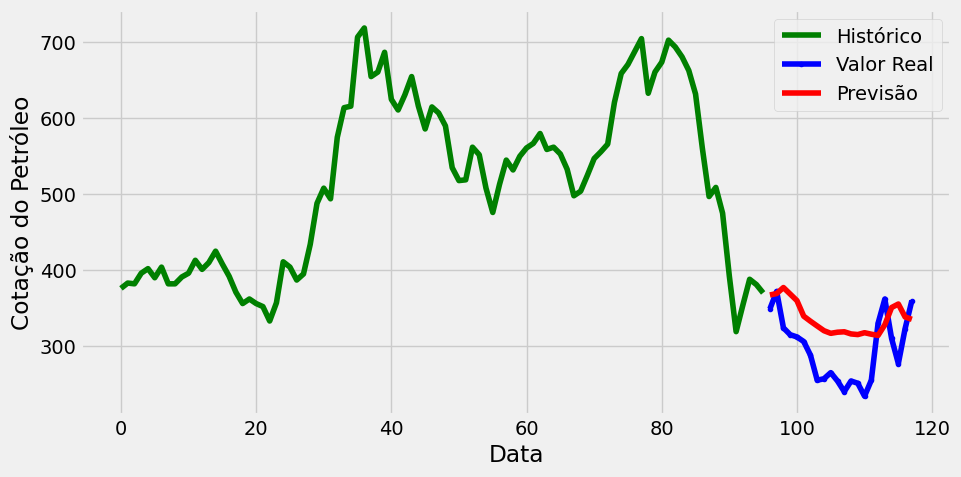

In [ ]:
# Plot
plt.plot(np.arange(0, len(y_train)),
         y_train_inv,
         color = 'green',
         label = "Histórico")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_test_inv,
         color = 'blue',
         marker = '.',
         label = "Valor Real")

plt.plot(np.arange(len(y_train),
                   len(y_train) + len(y_test)),
         y_pred_inv,
         color = 'red',
         label = "Previsão")

plt.ylabel('Cotação do Petróleo')
plt.xlabel('Data')
plt.legend()
plt.show();

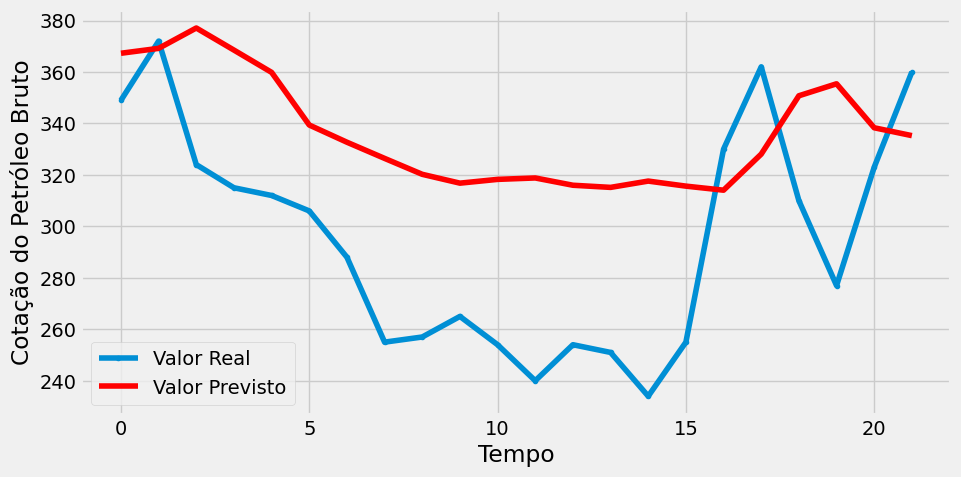

In [ ]:
# Plot apenas do valor real x valor previsto
plt.plot(y_test_inv, marker = '.', label = "Valor Real")
plt.plot(y_pred_inv, color = 'red', label = "Valor Previsto")
plt.ylabel('Cotação do Petróleo Bruto')
plt.xlabel('Tempo')
plt.legend()
plt.show();

### Avaliação

Métricas usadas na avaliacão do modelo:

- Mean Directional Accuracy (MDA), ou Acurácia Direcional Média em português, é uma métrica de desempenho usada para avaliar a precisão das previsões de séries temporais em termos da direção das mudanças. Essa métrica é particularmente útil quando a direção da mudança (aumento ou diminuição) é mais importante do que a magnitude da previsão em si. O MDA é calculado comparando as mudanças observadas nos valores reais com as mudanças previstas pelos valores ajustados.


- O Mean Absolute Error (MAE), ou Erro Médio Absoluto em português, é uma métrica de desempenho comumente usada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O MAE calcula a média das diferenças absolutas entre os valores previstos e os valores reais observados. Essa métrica é particularmente útil para quantificar a magnitude média do erro de previsão, independentemente da direção.


- O Mean Square Error (MSE), ou Erro Quadrático Médio em português, é uma métrica de desempenho comumente usada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O MSE mede a média das diferenças ao quadrado entre os valores previstos e os valores reais observados. Essa métrica é útil para quantificar a magnitude média do erro de previsão, levando em conta tanto a direção quanto a magnitude dos erros.


- O Root Mean Square Error (RMSE), ou Raiz do Erro Quadrático Médio em português, é uma métrica de desempenho amplamente utilizada para avaliar a qualidade das previsões em modelos de regressão e séries temporais. O RMSE calcula a média das diferenças ao quadrado entre os valores previstos e os valores reais observados, e então calcula a raiz quadrada dessa média. Essa métrica é útil para quantificar a magnitude média do erro de previsão, levando em conta a direção e a magnitude dos erros.


- O Explained Variance Score (EVS), ou pontuação da variância explicada em português, é uma métrica de desempenho usada para avaliar a qualidade das previsões em modelos de regressão. A pontuação da variância explicada mede a proporção da variância total dos valores observados que é explicada pelo modelo de regressão. Essa métrica é útil para quantificar a eficácia do modelo em capturar a estrutura dos dados.

In [ ]:
# Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [ ]:
# Imprime as métricas




#acurácia direcional media
MDA_mlp = mda(y_test_inv, y_pred_inv)
print('MDA:', MDA_mlp)

#erro médio absoluto
MAE_mlp = mean_absolute_error(y_test_inv, y_pred_inv)
print('MAE:', MAE_mlp)

#erro quadrático médio
MSE_mlp = mean_squared_error(y_test_inv, y_pred_inv)
print('MSE:', MSE_mlp)

#raiz do erro quadratico médio
RMSE_mlp = mean_squared_error(y_test_inv, y_pred_inv, squared = False)
print('RMSE:', RMSE_mlp)

#pontuação da variância explicada
EVS_mlp = explained_variance_score(y_test_inv, y_pred_inv)
print('EVS Score:', EVS_mlp)

MDA: 0.38095238095238093
MAE: 48.30054543235085
MSE: 2828.772623952393
RMSE: 53.186207083720426
EVS Score: 0.3712816733333715


O proprio professor fala que não sabe dizer se essas metricas são boas ou ruins porque este é a primeira versao ou nao.

Tem que criar outras versões para comparar para checar a melhoria dos modelos.

A interpretação aqui será por comparação. Outraas versoes mudando os hiperparametros ou com outras arquiteturas como deep learning, com os algoritmos lstm, cnn e etc.

In [ ]:
# Salva o modelo
def save_model(model):
    json_model = model.to_json()
    open('modelos/modelo_mlp.json', 'w').write(json_model)
    model.save_weights('modelos/modelo_mlp.h5', overwrite = True)

In [ ]:
#save_model(modelo_mlp)

##FIM